<a href="https://colab.research.google.com/github/hye0-n0/hye0-n0/blob/main/MLDL/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 구현

In [ ]:
import numpy as np

In [ ]:
class Perceptron(object):
  ''' 퍼셉트론 분류기
  
  매개변수
  eta : float (학습률)
  n_iter : int (훈련데이터 반복 횟수)
  random_state : int (난수 생성기 시드)

  속성
  w_ : 1d-array (가중치)
  errors_ : list (에포크마다 누적된 분류 오류)

  '''
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0, scale=0.01, size=1 + X.shape[1])  # 특성 수에 따른 가중치
    self.errors_ = []

    for _ in range(self.n_iter):
      errors=0
      for xi, target in zip(X, y):
        updata = self.eta * (target - self.predict(xi))
        self.w_[1:] += updata * xi
        self.w_[0] += updata
        errors += int(updata != 0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    '''입력계산'''
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    '''활성화 함수 적용(계단 함수)'''
    return np.where(self.net_input(X) >= 0, 1, -1)

In [ ]:
# 붓꽃 데이터 퍼셉트론 훈련

import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


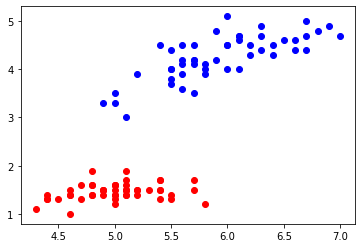

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values   # setosa, versicolor 선택
y = np.where(y == 'Iris-setosa', -1, 1)   # 특성 선택選擇

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='versicolor')

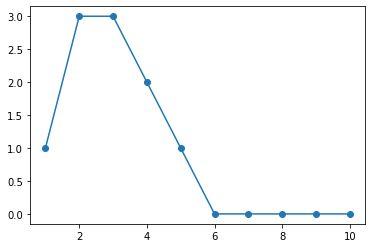

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # 샘플의 산점도
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')

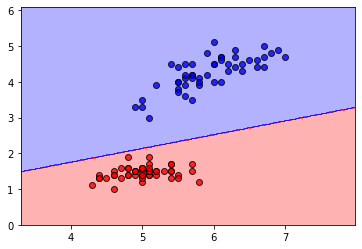

In [ ]:
plot_decision_regions(X, y, classifier=ppn)

In [ ]:
class AdalineGD(object):
  ''' 경사하강법
  
  매개변수
  eta : float (학습률)
  n_iter : int (훈련데이터 반복 횟수)
  random_state : int (난수 생성기 시드)

  속성
  w_ : 1d-array (가중치)
  cost_ : list (에포크마다 누적된 비용함수 제곱합)

  '''
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0, scale=0.01, size=1 + X.shape[1])  # 특성 수에 따른 가중치
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)  # 가중치 변화량
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    '''입력계산'''
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    '''선형 활성화 함수 적용'''
    return X

  def predict(self, X):
    '''활성화 함수 적용(계단))'''
    return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)